# Problem Statement:-

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Import all the required library.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# importing DataSet:-

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.shape

(32560, 15)

In [6]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 32560 observations with 15 features.


# Data inspection:-

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

as we can see the mostly columns are contains intiger and object type data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [11]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Checking Null values in the DataFrame:-

In [12]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

As we can see there is no null values are present in this dataset

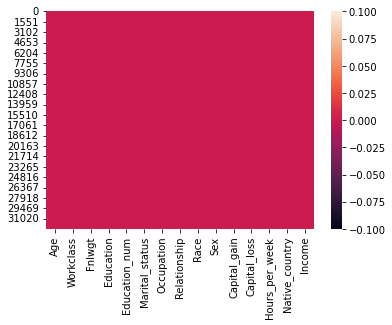

In [13]:
sns.heatmap(df.isnull())
plt.show()

above heatmap shows there is no null values are present in this dataset

# check Value counts:-

In [14]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [15]:
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
****************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
****************************************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
****************************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              4

In [16]:
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

no need of these columns soo i just drop those columns

In [17]:
df.shape

(32560, 13)

we saw there is "?" present insid the dataframe

Filling the '?' values:-

In [18]:
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [19]:
df["Workclass"].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [20]:
df["Occupation"].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [21]:
df["Native_country"].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

as we can see "?" successfully replaced

Replace  new classes to the columns have also unique type of classes,lets see what are they

In [22]:
df.Workclass=df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov'],' Govt-Sector')
df.Workclass=df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc'],' Pvt-sector')
df.Workclass=df.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')

In [23]:
df["Workclass"].value_counts()

 Pvt-sector     28189
 Govt-Sector     4350
Not-working        21
Name: Workclass, dtype: int64

we are minimise the data in shorter format for analyse it in better way

In [27]:
df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'School')
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],' High-School')
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')
df["Education"]=df["Education"].replace([' Bachelors',],' Under_Graduation')
df["Education"]=df["Education"].replace([' Masters'],'Post_Graduation')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')

In [28]:
df["Education"].value_counts()

 High-School         11077
 Secondary-School     9740
 Under_Graduation     5354
School                4253
Post_Graduation       1723
 PhD                   413
Name: Education, dtype: int64

here we just minimise 17 things of data to 6 catagory to analyse the data easily

In [30]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Others')

In [31]:
df["Marital_status"].value_counts()

 Married    14999
 Single     10682
 Others      6879
Name: Marital_status, dtype: int64

In [32]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K


as we can see all te classes data are changed in some catagorical data

In [33]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [34]:
# Checking for space in dataset
df.loc[df['Income']==" "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income


there is no space in this income column 

In [36]:
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


# Find catagorical & numerical data:-

In [40]:
categorical_col=[]
for i in df.dtypes.index:
    if  df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [42]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


# EDA:-

i.Univariate Analysis

<AxesSubplot:xlabel='Income', ylabel='count'>

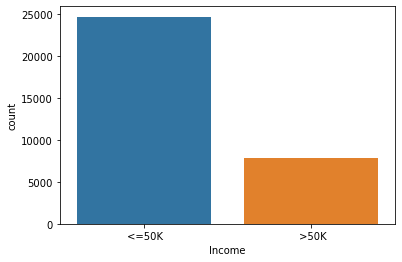

In [45]:
sns.countplot(df['Income'])

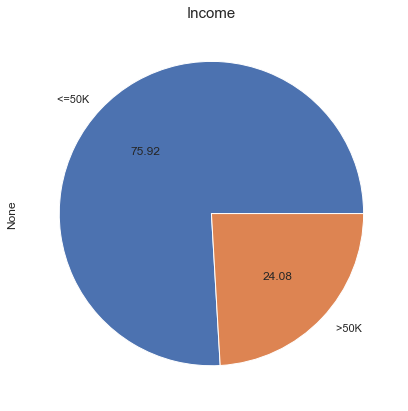

In [49]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
df.groupby('Income').size().plot(kind='pie', autopct='%.2f')
plt.title('Income', fontsize=15)
plt.show()

as we can clearly see 75.11 percent of population have anual income <=50K
Only 24.89 percentage of pepole are >=50K

<AxesSubplot:xlabel='Workclass', ylabel='count'>

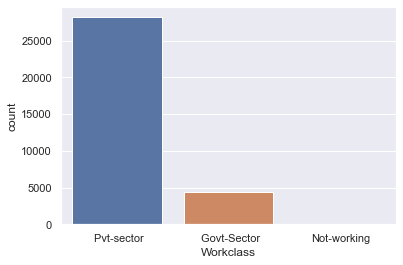

In [50]:
sns.countplot(df['Workclass'])

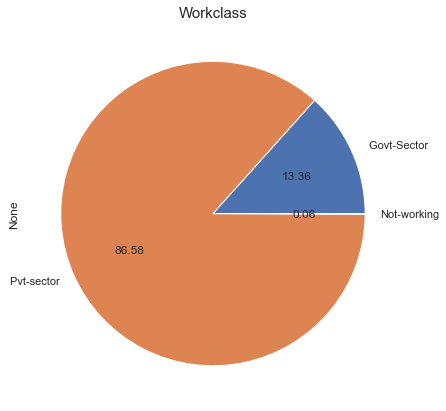

In [51]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
df.groupby('Workclass').size().plot(kind='pie', autopct='%.2f')
plt.title('Workclass', fontsize=15)
plt.show()

as we can clearly see that 86.58% of peoples are working in private sector where 13.36% people are doing job in govt. sector

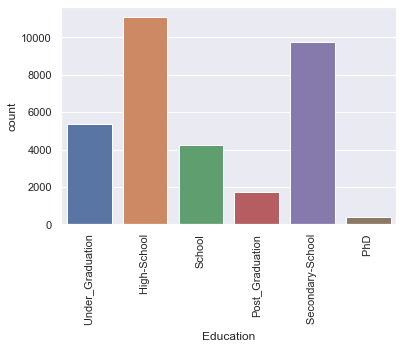

In [68]:
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

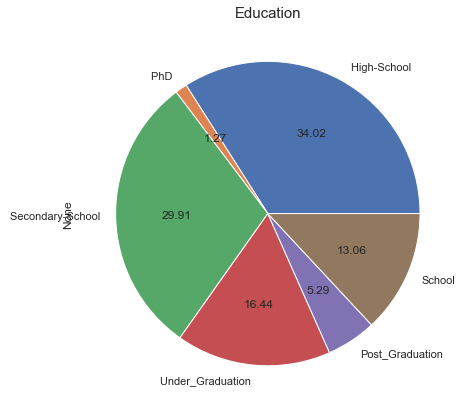

In [53]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
df.groupby('Education').size().plot(kind='pie', autopct='%.2f')
plt.title('Education', fontsize=15)
plt.show()

The numbers of High-School is greater which is followed by Secondary-School. Most of the people have their High School graduation with count more than 10K and secondary school with count of moe than 9k

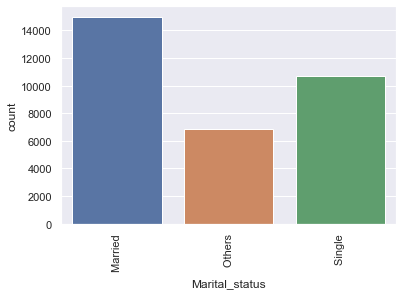

In [54]:
sns.countplot(df["Marital_status"])
plt.xticks(rotation=90)
plt.show()

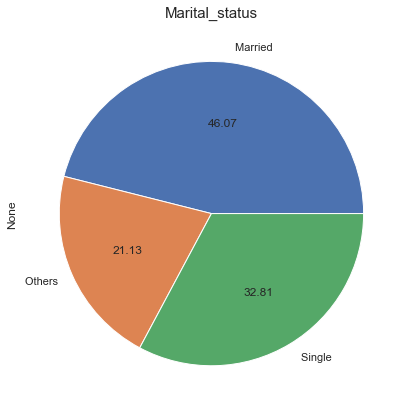

In [56]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
df.groupby("Marital_status").size().plot(kind='pie', autopct='%.2f')
plt.title("Marital_status", fontsize=15)
plt.show()

NO. of Married people are higher followed by the Singles or others..
singles and others have more popularity than married

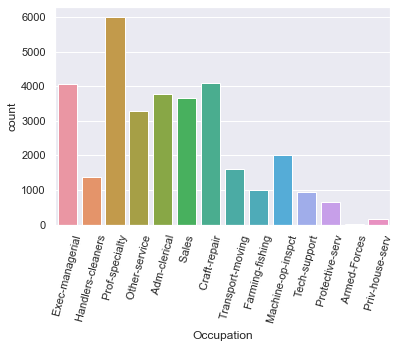

In [57]:
sns.countplot(df["Occupation"])
plt.xticks(rotation=75)
plt.show()

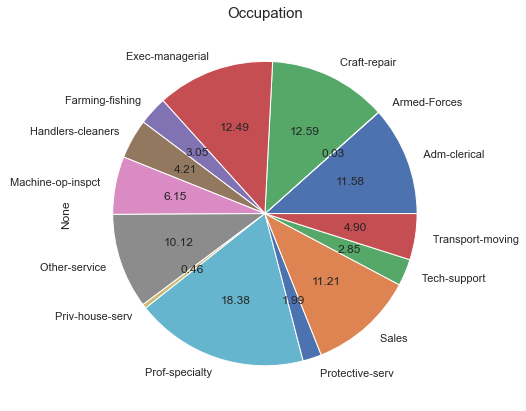

In [58]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
df.groupby("Occupation").size().plot(kind='pie', autopct='%.2f')
plt.title("Occupation", fontsize=15)
plt.show()

The people in Armed-Forces have very least number having 0.03% .and highest no is prof-speciality with 18.38%

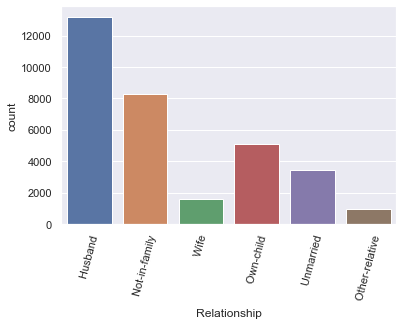

In [59]:
sns.countplot(df["Relationship"])
plt.xticks(rotation=75)
plt.show()

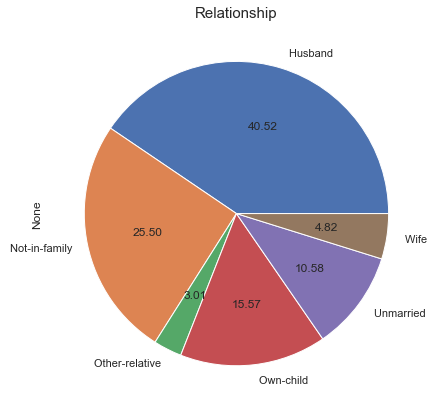

In [60]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
df.groupby("Relationship").size().plot(kind='pie', autopct='%.2f')
plt.title("Relationship", fontsize=15)
plt.show()

here we can clearly see the relationshp of highest no is Husband which having 40.52%

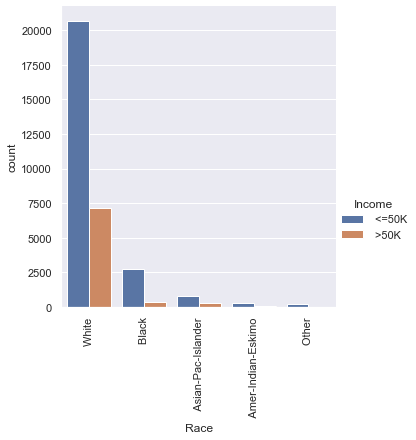

In [69]:
sns.factorplot('Race',kind='count',data=df,hue='Income')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Race', ylabel='count'>

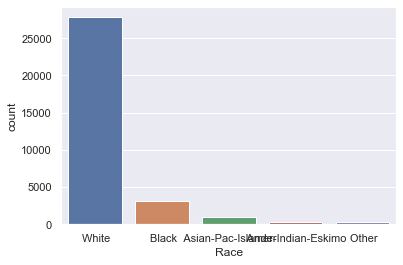

In [71]:
sns.countplot(df['Race'])

Looks like white people have more chance of getting job then any other race or colour.

<AxesSubplot:xlabel='Sex', ylabel='count'>

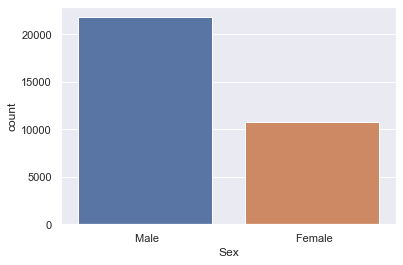

In [72]:
sns.countplot(df['Sex'])

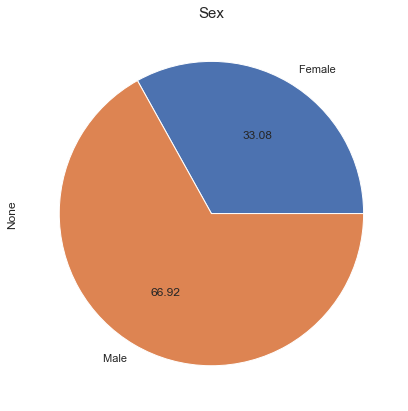

In [77]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
df.groupby("Sex").size().plot(kind='pie', autopct='%.2f')
plt.title("Sex", fontsize=15)
plt.show()

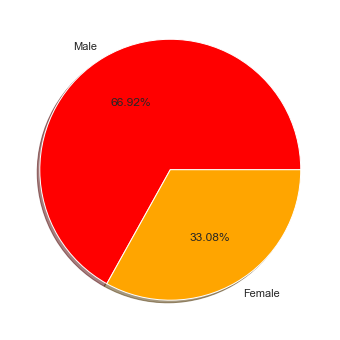

In [78]:
labels='Male','Female'
fig, ax = plt.subplots(figsize=(8,6))
colors = ["red","orange"]
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

Males count is higher than female by double.

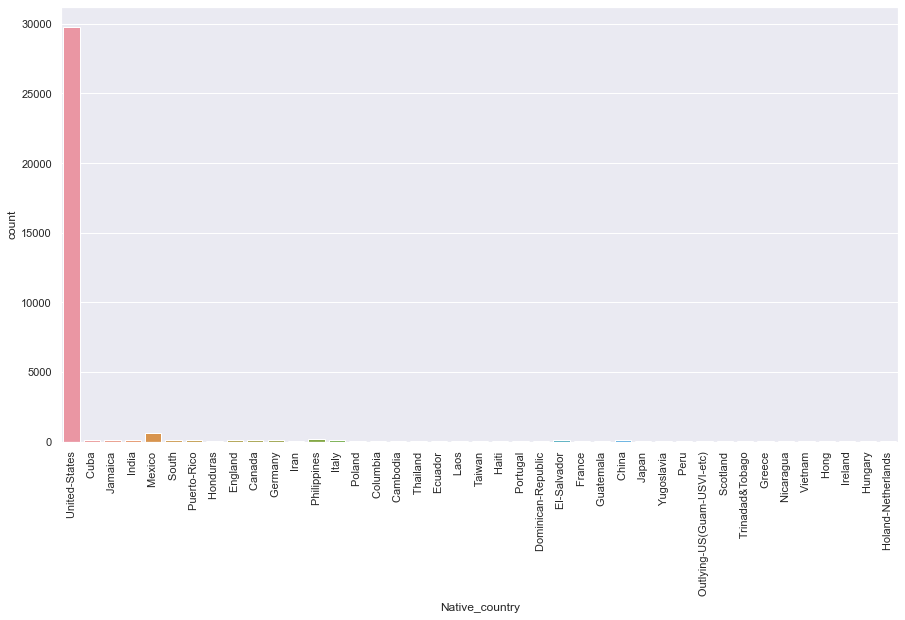

In [79]:
plt.figure(figsize=(15,8))
sns.countplot(df["Native_country"])
plt.xticks(rotation=90)
plt.show()

Here we can see more than 95 percent of the populaton is from United-states
This is becuase the data is collected form US population

# Check data distribution for Numerical column:-

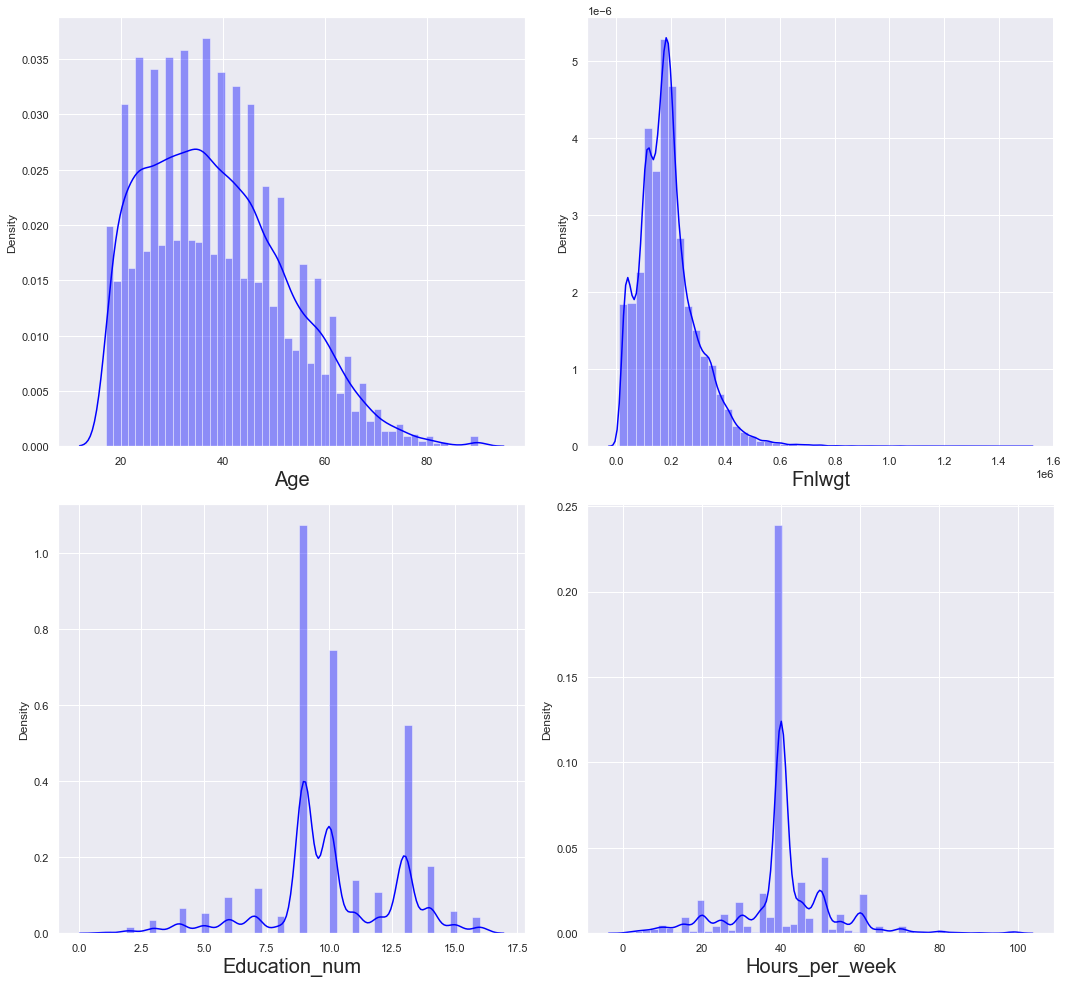

In [80]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column],color="blue")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

All the numerical columns are skewed but skewness is less in Age column

# ii.Bivariate Analysis

here we Visualizing the age of the people who have the income more

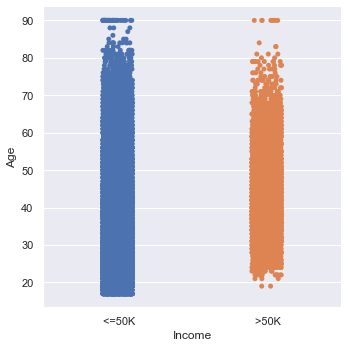

In [88]:
sns.catplot(x='Income',y='Age', data=df)

People between age group of 20 to 80 have annual income more than 50K.

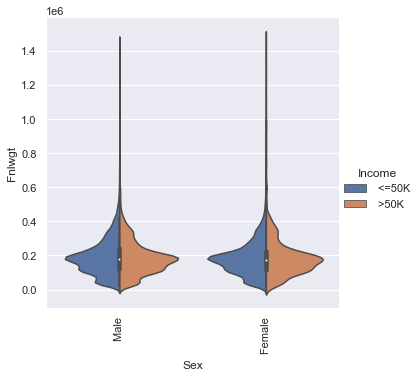

In [93]:
sns.catplot(x ="Sex",y="Fnlwgt",hue="Income",kind="violin",data=df,split=True)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Sex', ylabel='count'>

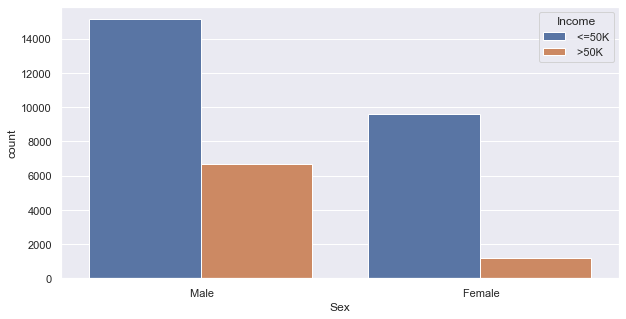

In [94]:
plt.figure(figsize = (10,5))
sns.countplot(x='Sex',hue='Income',data=df)

In [113]:
pd.crosstab(df['Income'], df['Sex'])

Sex,Female,Male
Income,,
<=50K,9592,15127
>50K,1179,6662


we can see Male population is having highher count as compared to Female, for income>=50K

Text(0.5, 1.0, 'Age')

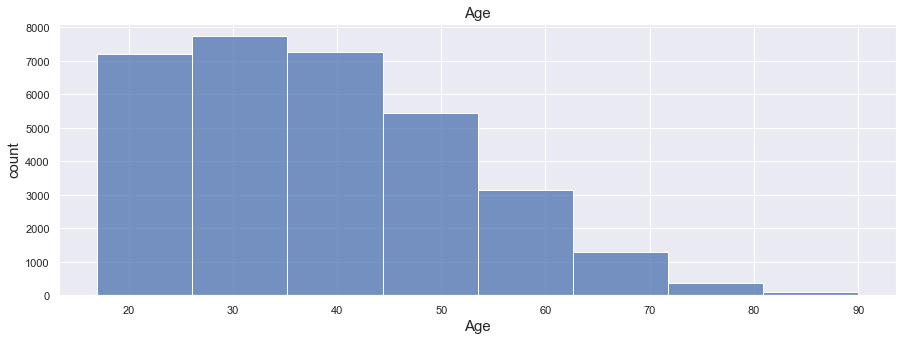

In [90]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,5))

sns.histplot(df['Age'], bins= 8)
plt.xlabel('Age', fontsize=15 )
plt.ylabel('count', fontsize=15 )
plt.title('Age', fontsize=15)

From histogram, we can predict most of The working age of US pupulation is between 20-50
very few pepole are working in the age above 50.

In [105]:
pd.crosstab(df['Income'], df['Workclass'])

Workclass,Govt-Sector,Pvt-sector,Not-working
Income,,,
<=50K,3009,21689,21
>50K,1341,6500,0


We have max population working in Private setor whose income income is <=50K per year.
At same time pepole working in private sector are more as compared to other setcor, whose income is >=50K per year.

Visualizing the number of Hours per week with income:-

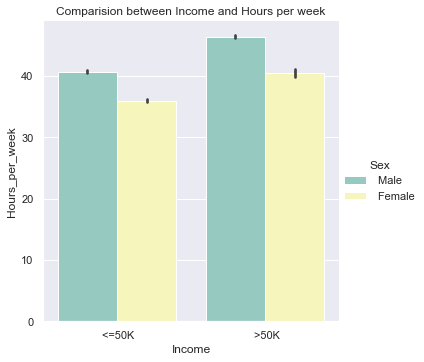

In [95]:
sns.catplot(x='Income',y='Hours_per_week', data=df,kind='bar',hue="Sex",palette="Set3");
plt.title('Comparision between Income and Hours per week')
plt.show()

Text(0.5, 1.0, 'Hours_per_week')

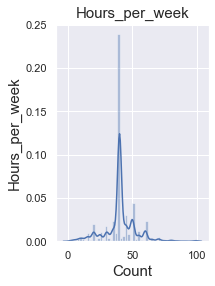

In [97]:
plt.subplot(1,2,1)
sns.distplot(df['Hours_per_week'])
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Hours_per_week', fontsize=15 )
plt.title('Hours_per_week', fontsize=15)

We can see  40 hrs/week is very high.

here we Visualizing the relation between Education and Income of the people :-

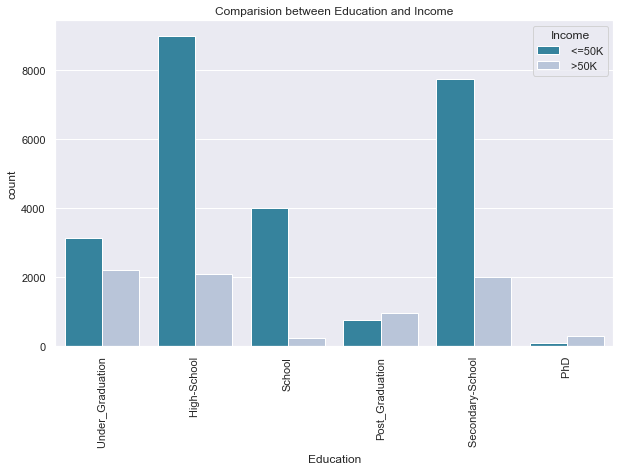

In [98]:
plt.figure(figsize=(10,6))
sns.countplot(df["Education"],hue=df["Income"],palette="PuBuGn_r" )
plt.title("Comparision between Education and Income")
plt.xticks(rotation=90)
plt.show()

-Graduate people have income more than 50K.
- where High school have income <=50K followed by the people who done their Secondary School

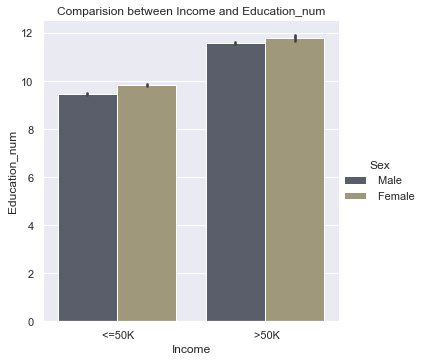

In [103]:
sns.catplot(x='Income',y='Education_num', data=df,kind='bar',hue="Sex",palette="cividis")
plt.title('Comparision between Income and Education_num')
plt.show()

The Income for people having high education is more than 50K, also both gender have the income more than 50K

In [106]:
# Visualizing the relation between Marital status and Income of the people

<Figure size 720x432 with 0 Axes>

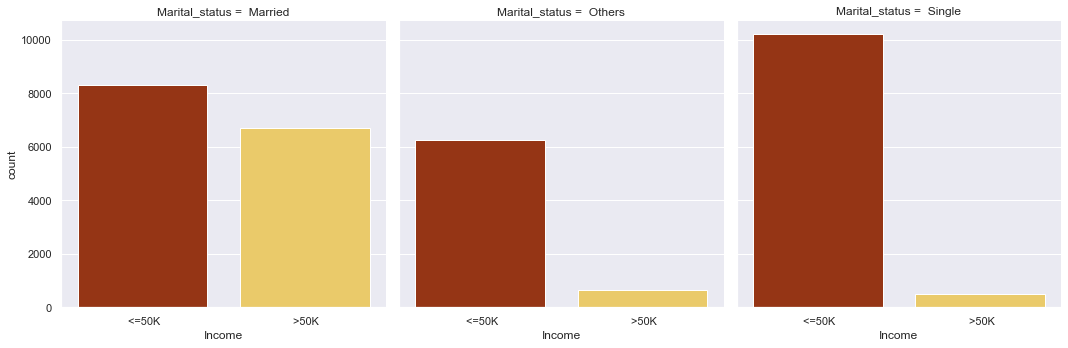

In [107]:
plt.figure(figsize=(10,6))
sns.catplot(x='Income',col='Marital_status',data=df,kind='count',palette="afmhot")
plt.show()

Married people have income >50K compare to others.

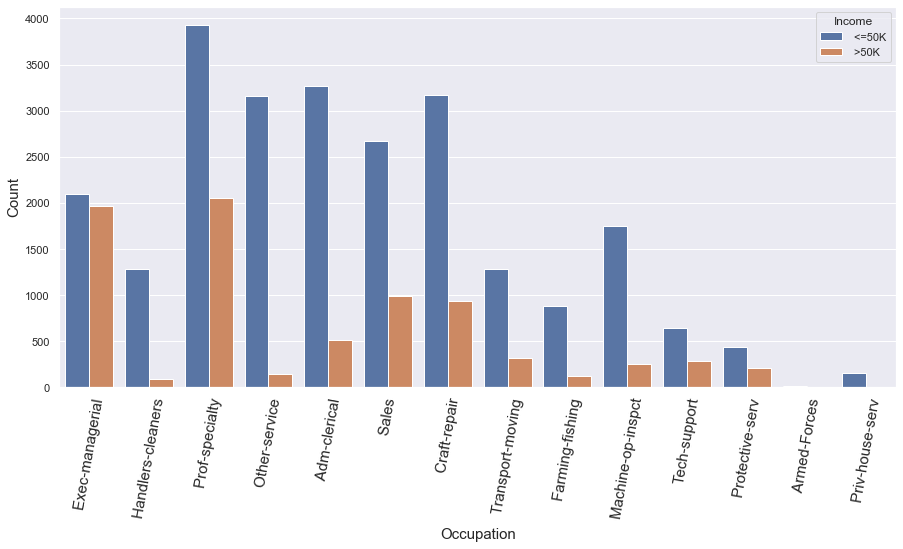

In [109]:
plt.figure(figsize=(15,7))
sns.countplot(df['Occupation'], hue='Income',data=df)
plt.xlabel('Occupation', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

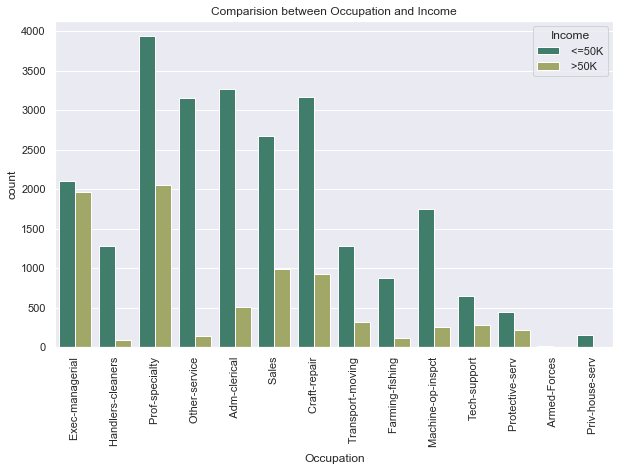

In [114]:
plt.figure(figsize=(10,6))
sns.countplot(df["Occupation"],hue=df["Income"],palette="gist_earth" )
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()

In [116]:
#here we Visualizing how the income changes for Native country of the people

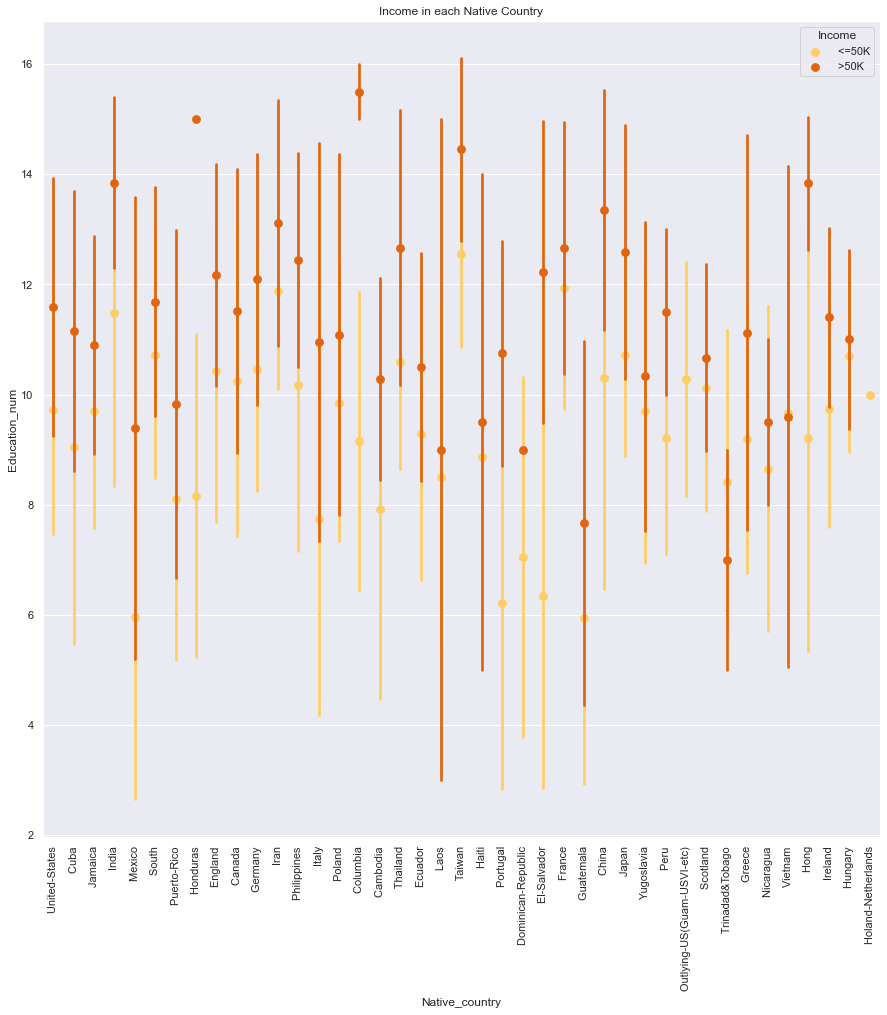

In [117]:
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="YlOrBr",ci="sd")
plt.xticks(rotation=90)
plt.show()

 iii.Multivariate Analysis

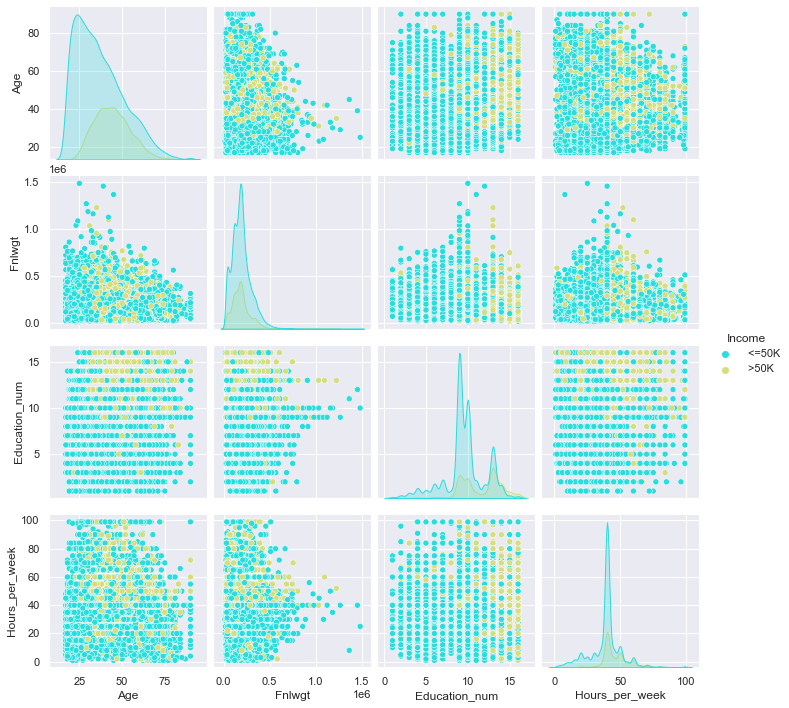

In [119]:
sns.pairplot(df,hue="Income",palette="rainbow")

# Checking Outliers:-

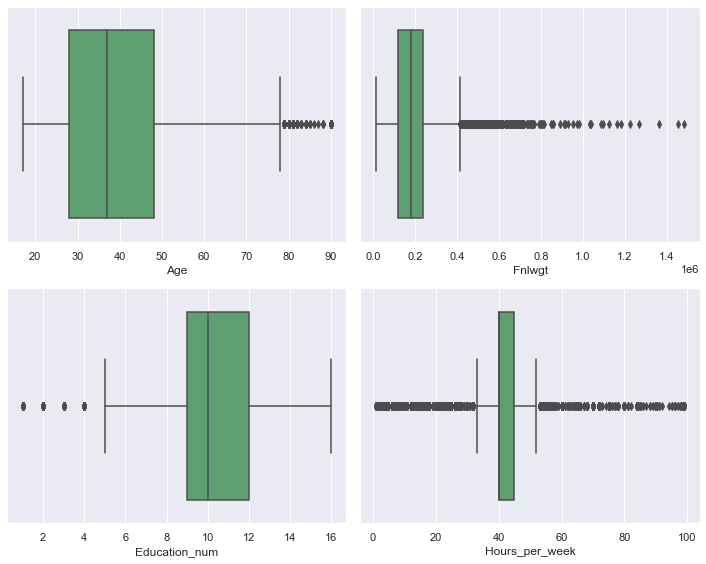

In [120]:
plt.figure(figsize=(10,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color="g")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Age                  AxesSubplot(0.125,0.749828;0.133621x0.130172)
Fnlwgt            AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Education_num      AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Hours_per_week    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
dtype: object

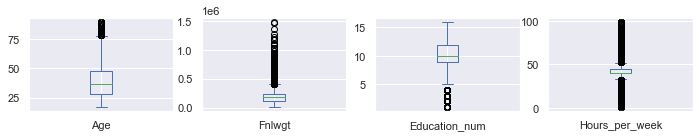

In [122]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10))

we can clearly see Outliers present in all the numerical columns.

# Removing outliers using Zscore:-

In [123]:
features=df[["Age","Fnlwgt","Education_num","Hours_per_week"]]  #all the columns in features are contains outliers

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.837097,1.008742,1.134779,2.222120
1,0.042640,0.245046,0.420027,0.035430
2,1.057031,0.425770,1.197429,0.035430
3,0.775755,1.408146,1.134779,0.035430
4,0.115952,0.898170,1.523480,0.035430
...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.197407
32556,0.103982,0.335466,0.420027,0.035430
32557,1.423589,0.358811,0.420027,0.035430
32558,1.215624,0.110927,0.420027,1.655200


In [124]:
new_df = df[(z<3).all(axis=1)] 
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Pvt-sector,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Pvt-sector,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Pvt-sector,151910,High-School,9,Others,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Pvt-sector,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [125]:
df.shape

(32560, 13)

In [126]:
new_df.shape

(31461, 13)

we can clearly see that some data are removing from previous dataset

# % of data loss:-

In [127]:
data_loss = (32560-31461)/36560*100
data_loss

3.0060175054704596

we can see we lost 3% of data as outliers using Zscore method

# IQR (Inter Quantile Range) method

In [128]:
# 1st quantile
Q1=features.quantile(0.25)
# 3rd quantile
Q3=features.quantile(0.75)
# IQR
IQR=Q3 - Q1

In [129]:
df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(21950, 13)

# %of data loss:-

In [130]:
# Checking the the data loss
data_loss2= (32560-21950)/36560*100
data_loss2

29.02078774617068

Here we can see we lost 29% of data while using IQR method

# Checking the skewness:-

as in IQR method we lost so muh of data soo here we consider Zscore outlier and check the skewness with new_df dataset

In [131]:
new_df.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

we always consie +/-5 as a good skewness  but here  Fnlwgt have litte high skewness

# Removing skewness:-

In [132]:
new_df["Fnlwgt"] = np.cbrt(df["Fnlwgt"])
new_df.skew()

Age               0.472279
Fnlwgt           -0.376609
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

here we can see all those skewness are in +/-5 range

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

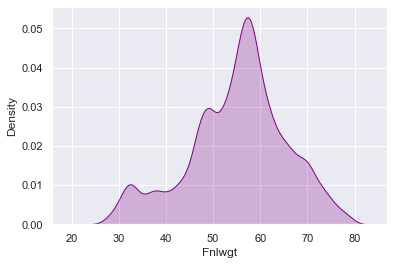

In [138]:
sns.distplot(new_df["Fnlwgt"],color="purple",kde_kws={"shade": True},hist=False)

The data looks almost normal and has no skewness.

# Encoding the data useing LabelEncoding:-

Here we use it for categorical columns

In [139]:
from sklearn.preprocessing import LabelEncoder

In [141]:
categorical_col=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [142]:
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,1,3,0,3,0,4,1,38,0
1,1,0,1,5,1,4,1,38,0
2,1,5,0,5,0,2,1,38,0
3,1,3,0,9,5,2,0,4,0
4,1,4,0,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,1,2,0,12,5,4,0,38,0
32556,1,0,0,6,0,4,1,38,1
32557,1,0,1,0,4,4,0,38,0
32558,1,0,2,0,3,4,1,38,0


In [143]:
# lets check Correlation between the target variable and independent variables by  HEAT map method

In [145]:
cor=new_df.corr()

In [146]:
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,-0.083618,-0.062328,-0.009682,0.053361,-0.476050,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,-0.083618,1.000000,0.021707,-0.035701,-0.161488,0.034265,0.005610,0.001008,0.051670,0.036158,-0.006349,-0.031665,-0.062963
Fnlwgt,-0.062328,0.021707,1.000000,0.007806,-0.031874,0.030462,0.001524,0.009060,-0.006959,0.023307,-0.015820,-0.061390,-0.002780
Education,-0.009682,-0.035701,0.007806,1.000000,-0.052888,0.037934,0.068764,0.001954,-0.005373,0.001626,-0.053121,-0.073192,0.034278
Education_num,0.053361,-0.161488,-0.031874,-0.052888,1.000000,-0.071406,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.476050,0.034265,0.030462,0.037934,-0.071406,1.000000,0.001052,0.451130,-0.081701,-0.336209,-0.241789,0.009096,-0.425904
Occupation,-0.001321,0.005610,0.001524,0.068764,0.073927,0.001052,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,0.001008,0.009060,0.001954,-0.102497,0.451130,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.051670,-0.006959,-0.005373,0.030849,-0.081701,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.036158,0.023307,0.001626,0.016662,-0.336209,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


<AxesSubplot:>

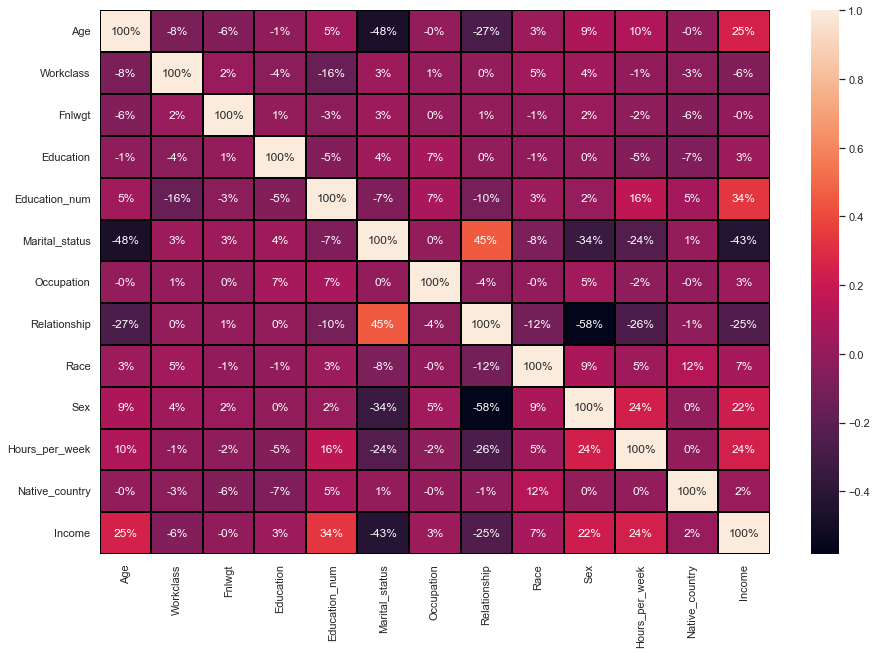

In [150]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),annot=True,linewidth=0.01,linecolor='black',fmt='0.0%')

1. There is no multicolinearity issue.
2. Workclass and Fnlwgt has very less correlation with target.
3. Native country, Occupation, Race and Education has less correlation with target column.
4. The columns Education num, Age, Sex and Hours per week have positive correlation with the target.

In [153]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.337595
Age               0.248351
Hours_per_week    0.242383
Sex               0.216665
Race              0.072451
Occupation        0.034612
Education         0.034278
Native_country    0.017698
Fnlwgt           -0.002780
Workclass        -0.062963
Relationship     -0.251506
Marital_status   -0.425904
Name: Income, dtype: float64

# Visualizing correlation using bar plot:-

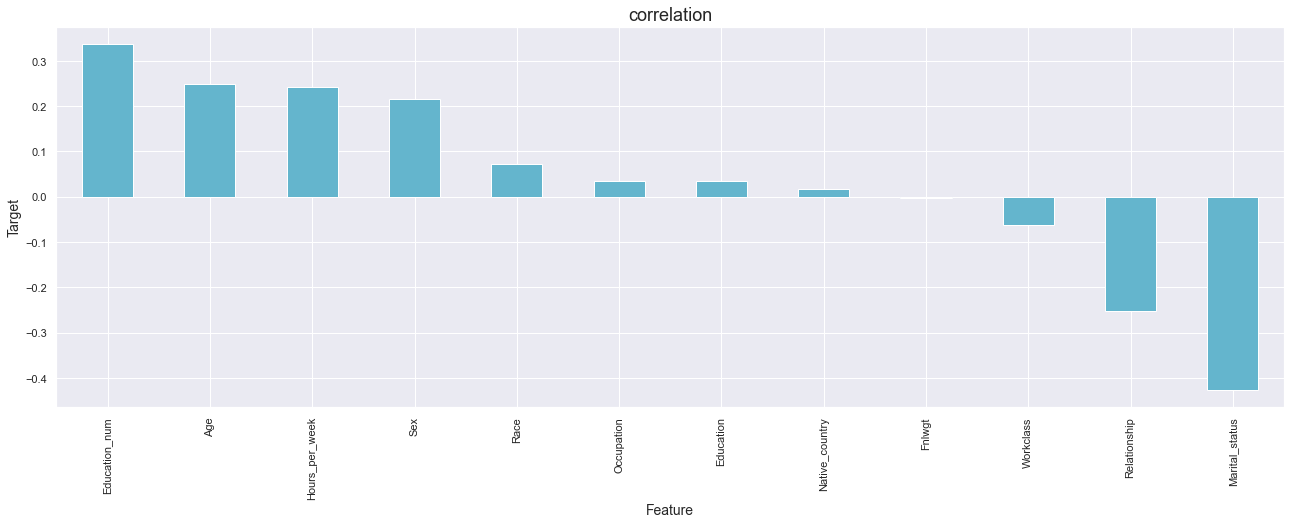

In [156]:
plt.figure(figsize=(22,7))
new_df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

The column Fnlwgt has very less correlation with the label so we can drop it .

# Separating the features and label:-

In [157]:
x=new_df.drop("Income",axis=1)
y=new_df["Income"]

In [158]:
x.shape

(31461, 12)

In [159]:
y.shape

(31461,)

# Scaling the data using standard scaler:-

In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,0.392103,-1.102052,0.621080,1.154324,-0.990371,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,0.392103,0.464976,-1.149684,-0.459657,0.147158,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,0.392103,0.630260,1.801589,-1.266647,-0.990371,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,0.392103,1.399791,0.621080,1.154324,-0.990371,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,0.392103,1.023711,1.211335,1.557819,-0.990371,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.850723,0.392103,0.814728,0.030825,0.750829,-0.990371,1.474703,2.203019,0.391304,-1.415226,-0.187309,0.254062
31457,0.124718,0.392103,-0.143169,-1.149684,-0.459657,-0.990371,-0.031323,-0.903178,0.391304,0.706601,-0.008364,0.254062
31458,1.475327,0.392103,-0.170768,-1.149684,-0.459657,0.147158,-1.537348,1.581780,0.391304,-1.415226,-0.008364,0.254062
31459,-1.225892,0.392103,0.335900,-1.149684,-0.459657,1.284688,-1.537348,0.960541,0.391304,0.706601,-1.797814,0.254062


In [163]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

Balancing the target variable by using  oversampling:-

<AxesSubplot:xlabel='Income', ylabel='count'>

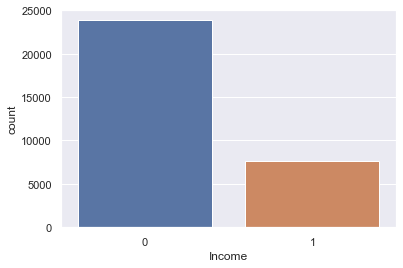

In [168]:
y.value_counts()
sns.countplot(y)

now the data looks balanced.

In [169]:
new_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,1,43.675121,3,13,0,3,0,4,1,13,38,0
1,38,1,59.967204,0,9,1,5,1,4,1,40,38,0
2,53,1,61.685627,5,7,0,5,0,2,1,40,38,0
3,28,1,69.686283,3,13,0,9,5,2,0,40,4,0
4,37,1,65.776255,4,14,0,3,5,4,0,40,38,0


# Finding  Best Random State and Accuracy:-

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [181]:
maxAccu=0           #max accuracy    
maxRS=0             #for best ranom state value for wuich max accuracy is acheived
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)        #fitting the data 
    pred = DTC.predict(x_test)        #predicted target variable
    acc=accuracy_score(y_test, pred)
    print('accuracy : ',acc,'random state :',i)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

accuracy :  0.7730691810573154 random state : 1
accuracy :  0.7794257866299397 random state : 2
accuracy :  0.7702087085496345 random state : 3
accuracy :  0.7720097467952114 random state : 4
accuracy :  0.7744464455980506 random state : 5
accuracy :  0.7703146519758449 random state : 6
accuracy :  0.7722216336476322 random state : 7
accuracy :  0.7633223858459582 random state : 8
accuracy :  0.7768831444008899 random state : 9
accuracy :  0.772433520500053 random state : 10
accuracy :  0.7737048416145779 random state : 11
accuracy :  0.772433520500053 random state : 12
accuracy :  0.7767772009746795 random state : 13
accuracy :  0.7711621993855281 random state : 14
accuracy :  0.7688314440088992 random state : 15
accuracy :  0.772963237631105 random state : 16
accuracy :  0.7792138997775188 random state : 17
accuracy :  0.7714800296641593 random state : 18
accuracy :  0.7708443691068969 random state : 19
accuracy :  0.7753999364339442 random state : 20
accuracy :  0.7731751244835258 r

In [182]:
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.783451636825935  on Random_state  88


# Creating train test split:-

In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=88)

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# DecisionTreeClassifier:-

In [187]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)   #prediction

print('accuracy is :-',accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

accuracy is :- 0.7823922025638309
[[6137 1044]
 [1010 1248]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      7181
           1       0.54      0.55      0.55      2258

    accuracy                           0.78      9439
   macro avg       0.70      0.70      0.70      9439
weighted avg       0.78      0.78      0.78      9439



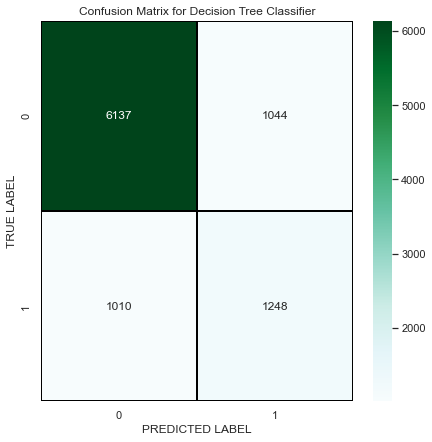

In [188]:
cm = confusion_matrix(y_test,predDTC)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifier:-

In [190]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
# Prediction
predRFC = RFC.predict(x_test)

print('accuracy is :-',accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

accuracy is :- 0.8266765547197796
[[6504  677]
 [ 959 1299]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7181
           1       0.66      0.58      0.61      2258

    accuracy                           0.83      9439
   macro avg       0.76      0.74      0.75      9439
weighted avg       0.82      0.83      0.82      9439



Here accuracy is  82%

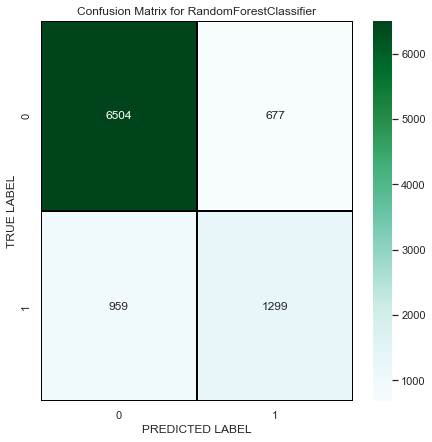

In [191]:
cm = confusion_matrix(y_test,predRFC)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Logistic Regression:-

In [193]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
# Prediction
predLR = LR.predict(x_test)

print('Accuracy is :-',accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

Accuracy is :- 0.8247695730479924
[[6625  556]
 [1098 1160]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7181
           1       0.68      0.51      0.58      2258

    accuracy                           0.82      9439
   macro avg       0.77      0.72      0.74      9439
weighted avg       0.81      0.82      0.82      9439



here accuracy is 82%

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Classifier')

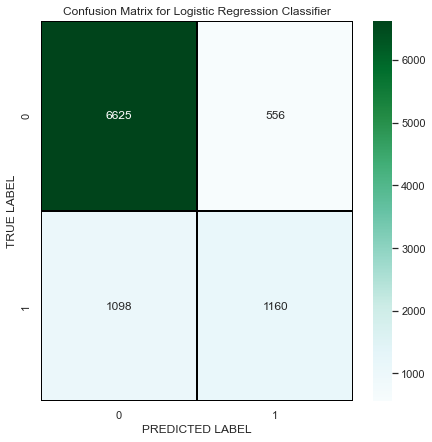

In [195]:
cm = confusion_matrix(y_test,predLR)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')

# KNeighbors Classifier:-

In [197]:
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print('Accuracy is:-',accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

Accuracy is:- 0.8133276830172688
[[6361  820]
 [ 942 1316]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7181
           1       0.62      0.58      0.60      2258

    accuracy                           0.81      9439
   macro avg       0.74      0.73      0.74      9439
weighted avg       0.81      0.81      0.81      9439



here accuracy is 81%

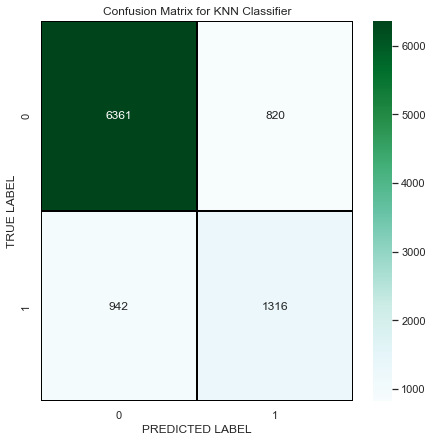

In [198]:
cm = confusion_matrix(y_test,predknn)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Gradient Boosting Classifier:-

In [199]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print('Accuracy is :- ',accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

Accuracy is :-  0.8448988240279691
[[6649  532]
 [ 932 1326]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7181
           1       0.71      0.59      0.64      2258

    accuracy                           0.84      9439
   macro avg       0.80      0.76      0.77      9439
weighted avg       0.84      0.84      0.84      9439



accuracy using Gradient Boosting Classifier is 84%

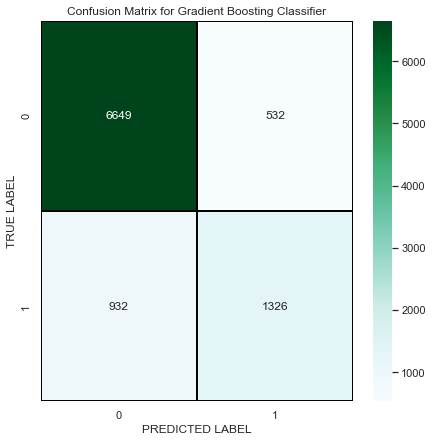

In [200]:
cm = confusion_matrix(y_test,predGB)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Cross Validation:-

In [201]:
from sklearn.model_selection import cross_val_score

In [210]:
scr=cross_val_score(LR,x,y,cv=5)
print('Cross Validation score of Logistic Regression model : ',scr.mean())

Cross Validation score of Logistic Regression model :  0.8230192448869766


In [203]:
scr2=cross_val_score(DTC,x,y,cv=5)
print('Cross Validation score of Decision tree model : ',scr2.mean())

Cross Validation score of Decision tree model :  0.7733386393159879


In [209]:
scr3=cross_val_score(RFC,x,y,cv=5)
print('Cross Validation score of Random Forest model : ',scr3.mean())

Cross Validation score of Random Forest model :  0.8223198381151662


In [205]:
scr4=cross_val_score(knn,x,y,cv=5)
print('Cross Validation score of SVC model : ',scr4.mean())

Cross Validation score of SVC model :  0.8104004348366771


In [206]:
scr5=cross_val_score(GB,x,y,cv=5)
print('Cross Validation score of SVC model : ',scr4.mean())

Cross Validation score of SVC model :  0.8104004348366771


# Hyper Parameter tuning:-

In [221]:
from sklearn.model_selection import GridSearchCV

In [223]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[15,20,25,35],
            'n_estimators':[100,200,300,400],
            'criterion':['gini','entropy']}

In [ ]:
GCV.fit(x_train,y_train)
GCV.best_params_

In [224]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [227]:
Final_mod=RandomForestClassifier(criterion='gini',max_depth=25, max_features='auto', n_estimators=400)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

83.03845746371438


its tune upto 1-2%

So here the RFC is best model with an accuracy of 83.03% after tunning.

# ROC-AUC curve:-

In [229]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

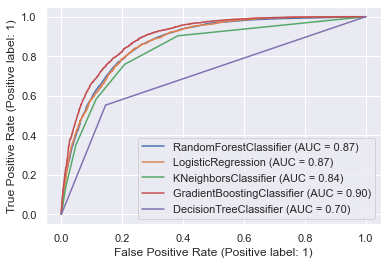

In [232]:
disp=plot_roc_curve(RFC,x_test,y_test)
# ax_=Axes with confusion matrix
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

we can see AUC score of Random forest classifier & logistic regression is 87%
where gradiant boost and knn scores are 90 & 84 accordingly and Desicision tree have 70% score which is low among all

# Saving the model:-

In [233]:
import joblib
joblib.dump(Final_mod,"Census_Income_Project.pkl")

['Census_Income_Project.pkl']

# Lets Predicting the saved model:-

In [234]:
model=joblib.load("Census_Income_Project.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [238]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T   #T for table format

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
9434,0,0
9435,0,0
9436,0,0
9437,0,0


it looks like all the actual and predicted values are almost same.